In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad
from agent import Agent

In [2]:
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]

agent = Agent(player_feature_names, opponent_feature_names, model_path="./trained_models/player_oppponent_linear_score_model.pt")
await agent.get_data()
await agent.update_model()
current_squad, non_squad = await agent.get_new_squad(player_feature_names, opponent_feature_names)

/home/ajayrfhp/miniconda3/envs/control/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajayrfhp/Documents/Control/Control_FPL/data_processor.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


Hugo Lloris


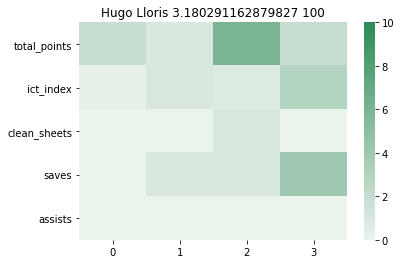

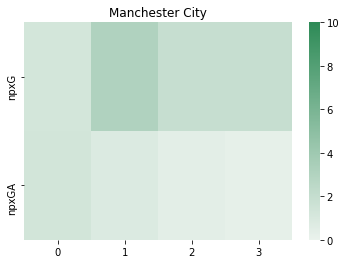

Harry Maguire


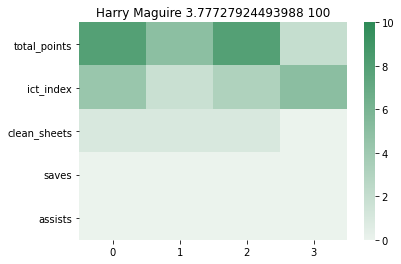

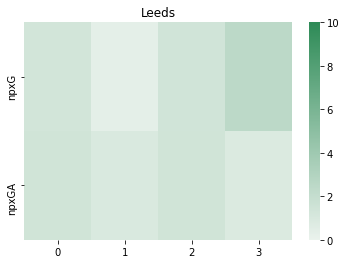

Timothy Castagne


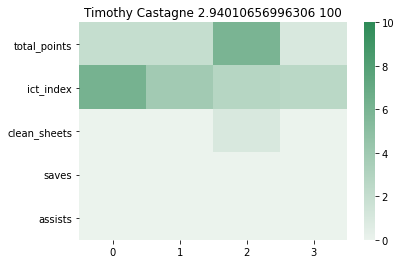

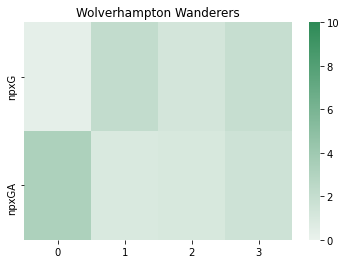

Ben Johnson


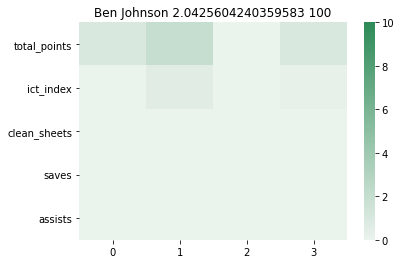

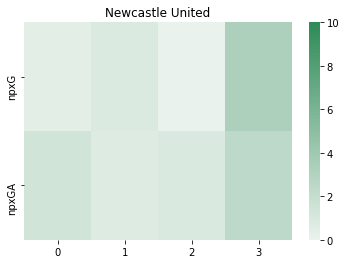

Jesse Lingard


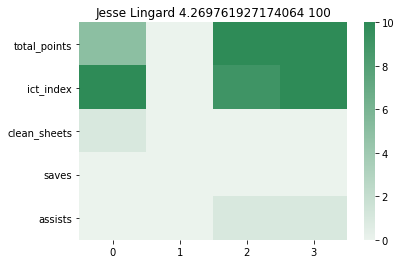

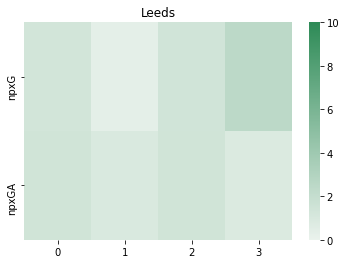

James Rodríguez


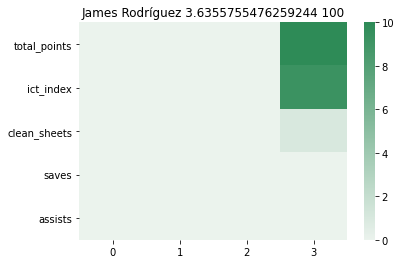

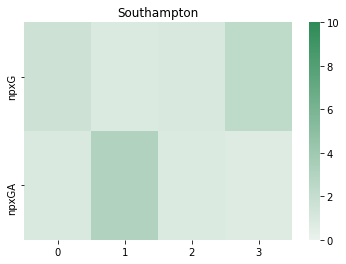

Wilfried Zaha


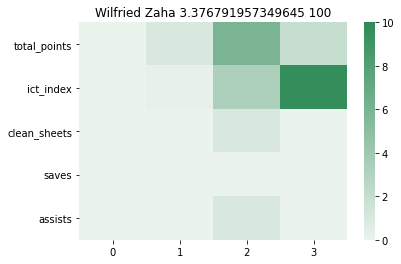

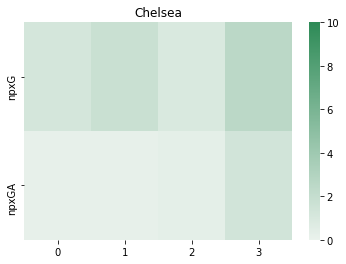

Gylfi Sigurdsson


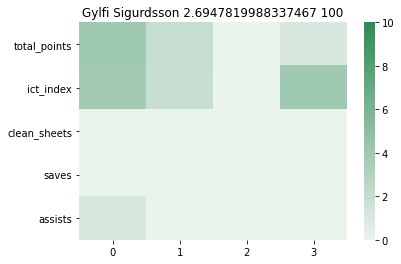

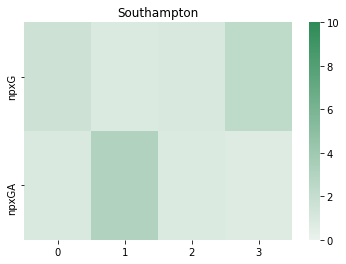

Chris Wood


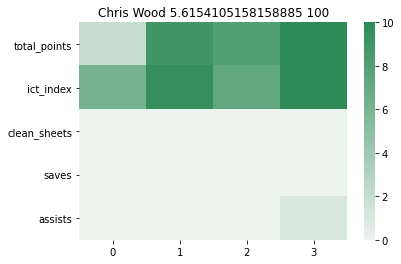

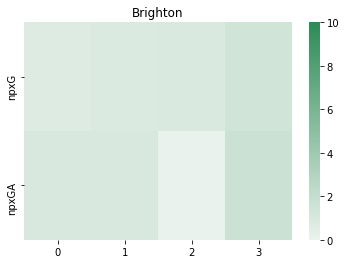

Gabriel Fernando de Jesus


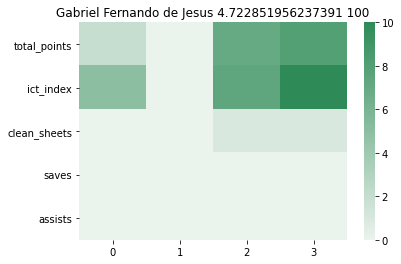

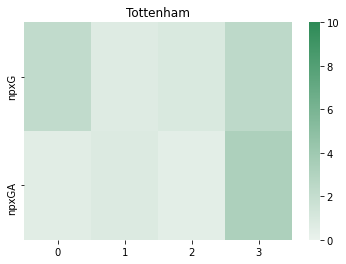

Alexandre Lacazette


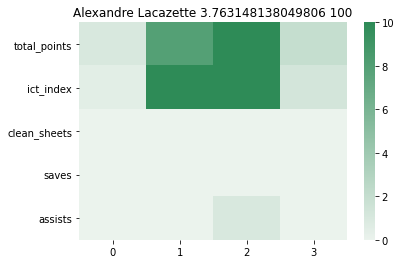

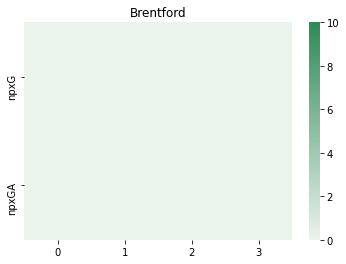

In [3]:
agent.set_playing_11(current_squad, visualize=True)





Goalkeeper


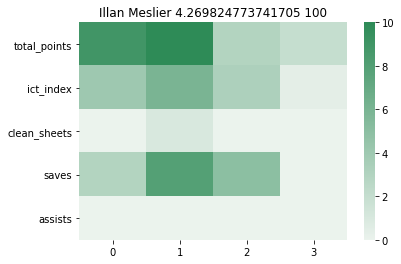

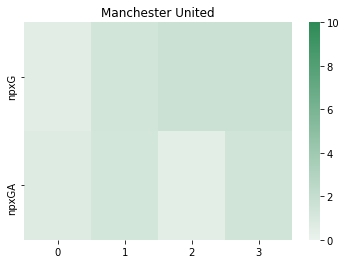

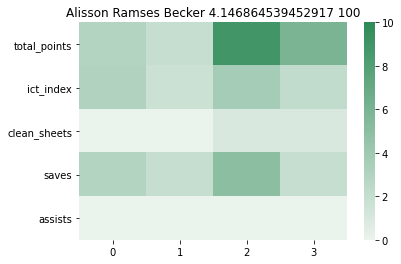

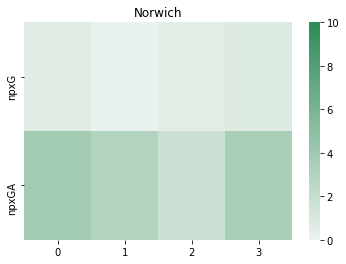

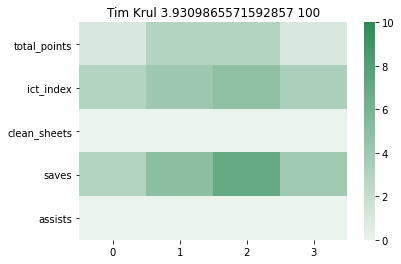

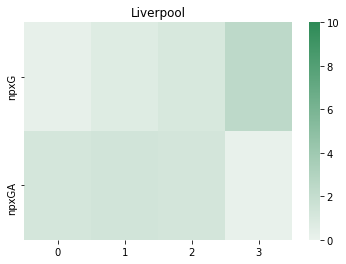

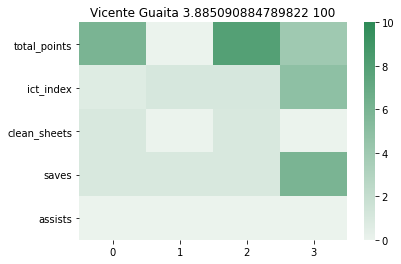

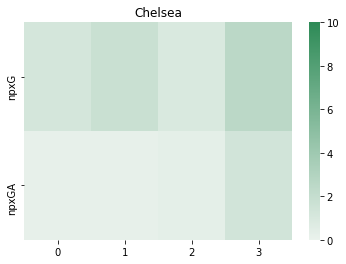

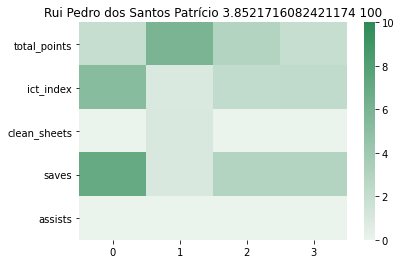

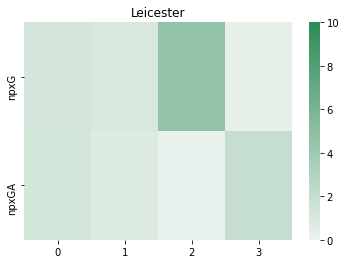










Defender


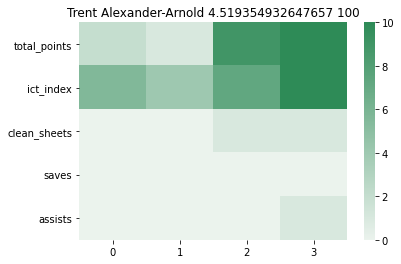

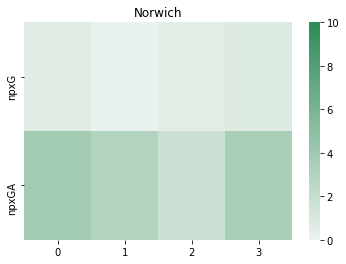

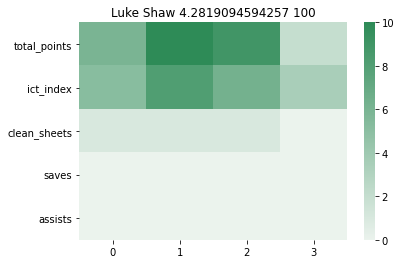

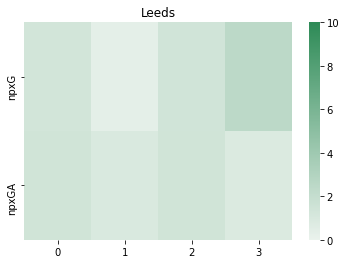

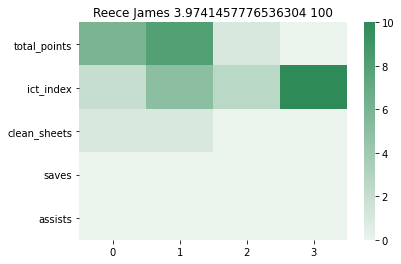

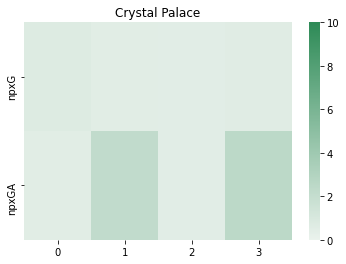

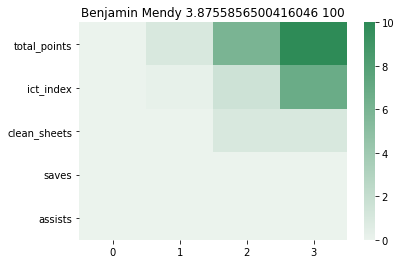

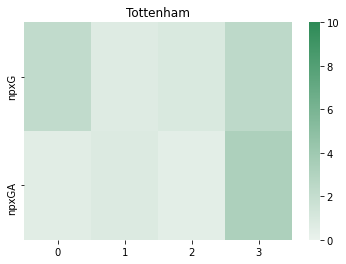

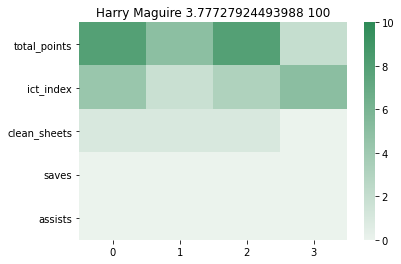

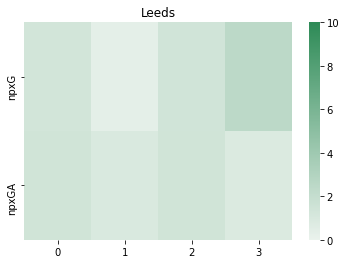










Midfielder


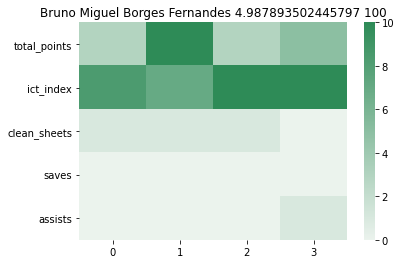

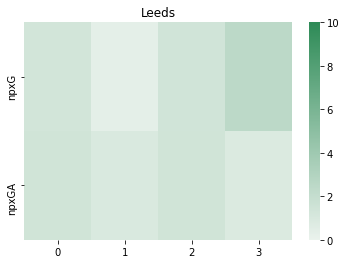

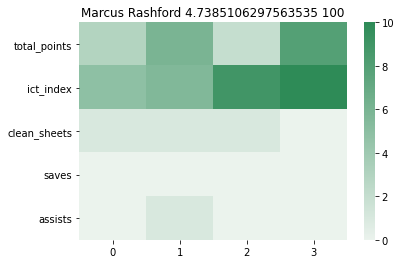

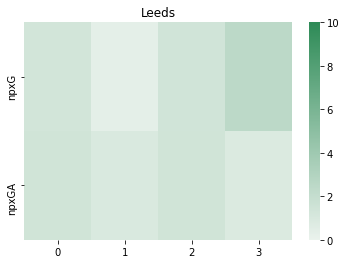

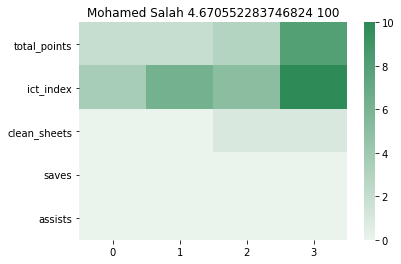

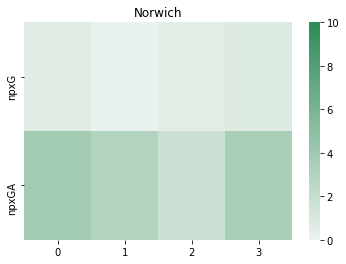

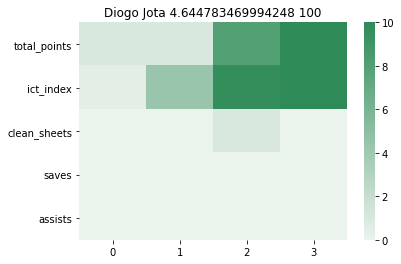

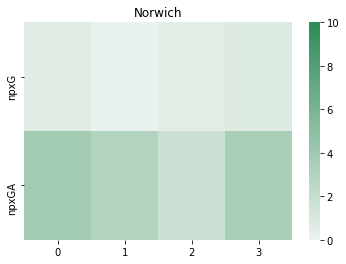

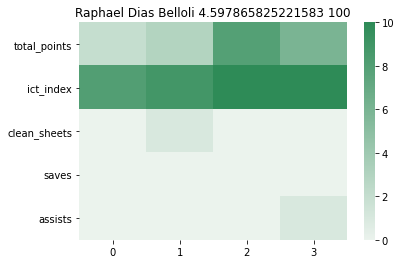

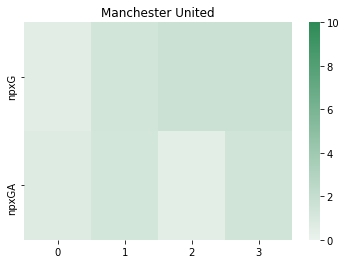










Forward


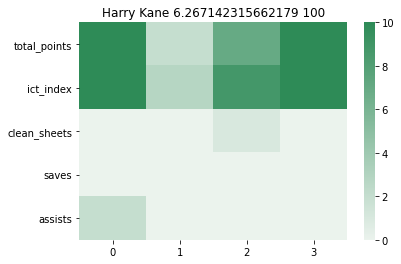

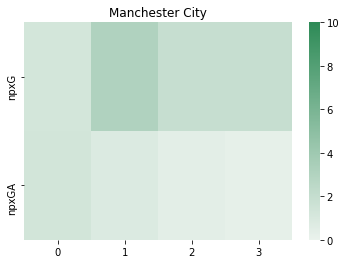

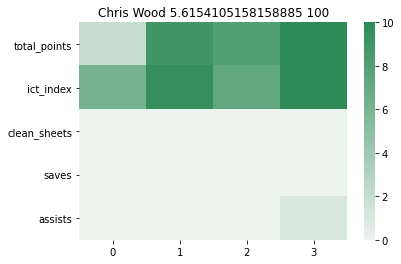

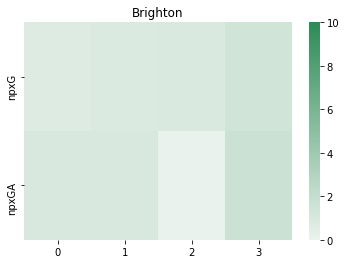

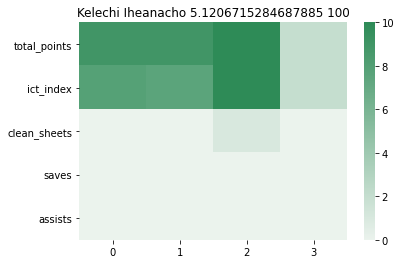

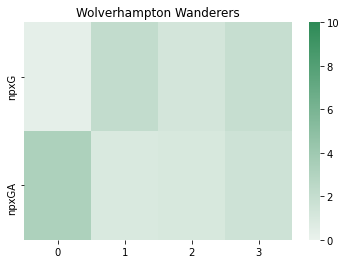

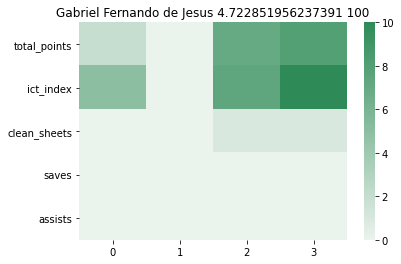

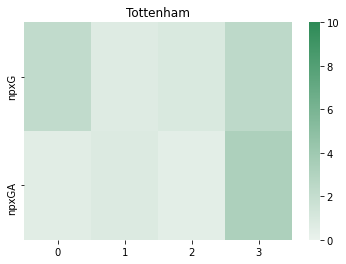

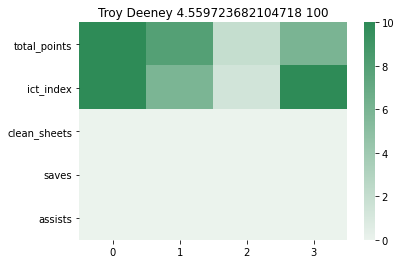

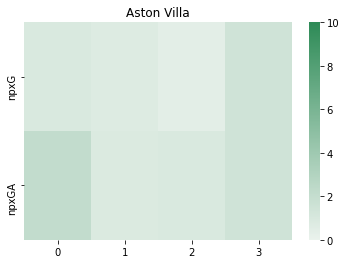

In [4]:
agent.show_top_performers(current_squad + non_squad, k=5)

In [5]:
gameweek = os.environ['GAME_WEEK']
os.system(f'cp agent.ipynb results/agent_{gameweek}.ipynb')
os.system(f'jupyter nbconvert --to html results/agent_{gameweek}.ipynb')

0